# Task 2.1
## Gradiente Descendente

**Definicion y visualizacion del polinomio grado 3**

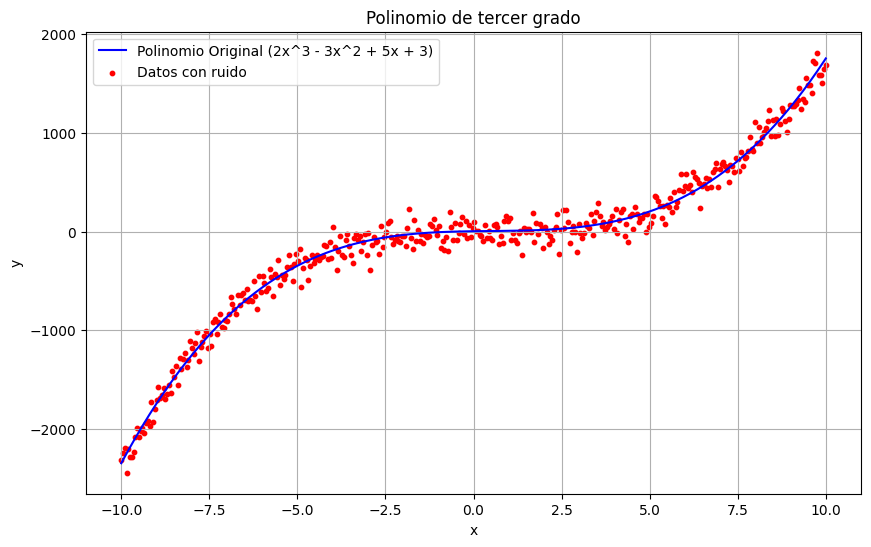

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Omitir warnings de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Definir los coeficientes de la funcion polinomial de 3er grado
coefficients = [2, -3, 5, 3]

# Generar valores de 'x'
x_values = np.linspace(-10, 10, 400)

# Obtener los valores 'y' asocieados
y_values = np.polyval(coefficients, x_values)

# Agregar "ruido" a la data para un escenario mas realista
noise = np.random.normal(0, 100, y_values.shape)
y_values_noisy = y_values + noise

# Visualizacion del modelo base
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.title('Polinomio de tercer grado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


**Definir y visualizar un modelo 'aleatorio' inicial**

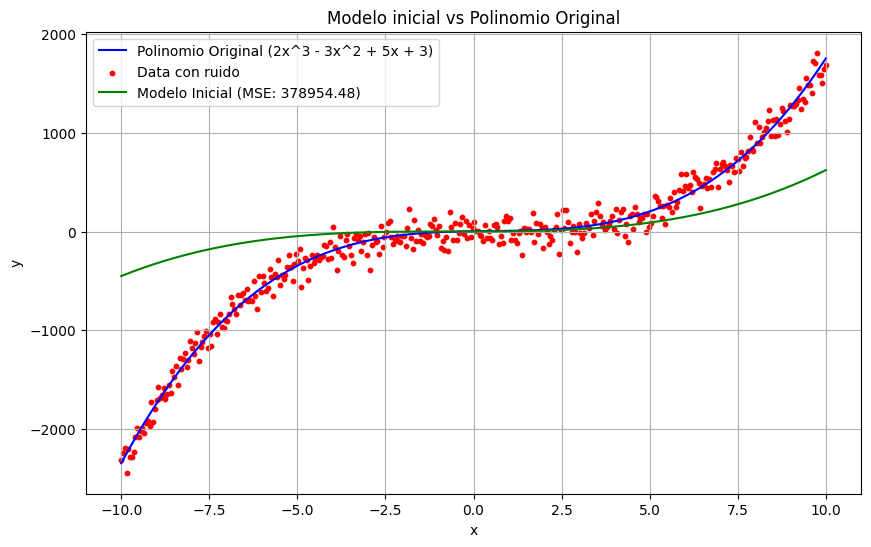

(array([0.53229181, 0.84964204, 0.41726351, 0.26949768]), 378954.4833425903)

In [2]:
# Coeficientes aleatorios del polinomio
initial_coefficients = np.random.rand(4)

# Obtener los valores 'y' asociados
y_pred_initial = np.polyval(initial_coefficients, x_values)

# Obtener el MSE de este modelo
mse_loss_initial = np.mean((y_values_noisy - y_pred_initial) ** 2)

# Visualizar el fit de este modelo aleatorio
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Data con ruido', color='red', s=10)
plt.plot(x_values, y_pred_initial, label=f'Modelo Inicial (MSE: {mse_loss_initial:.2f})', color='green')
plt.title('Modelo inicial vs Polinomio Original')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

initial_coefficients, mse_loss_initial


Al examinar los coeficientes, es evidente que difieren significativamente del polinomio anticipado. Además, el error cuadrático medio (MSE) de este modelo inicial generado al azar es excesivamente elevado, lo que señala que el modelo no se adapta correctamente a nuestros datos.

**Escalado de las Features**

In [3]:
from sklearn.preprocessing import StandardScaler

# Reorganizar los valores de 'x' para el scaler
x_values_reshaped = x_values.reshape(-1, 1)

# Generar features
x_poly = np.hstack([x_values_reshaped**i for i in range(1, 4)])

# Inicializa el escalador
scaler = StandardScaler()

# Ajustar el escalador y transformar los datos
x_poly_scaled = scaler.fit_transform(x_poly)

# Agregar el bias despues del escalado
x_poly_scaled = np.hstack([np.ones(x_values_reshaped.shape), x_poly_scaled])


**Funcion de Gradiente Descendente**

In [4]:
def compute_gradients(coefficients, x_poly_scaled, y_values):
    
    # Obtener los valos 'y' asociados a las 'x' escaladas
    predictions = np.dot(x_poly_scaled, coefficients)
    
    # Calcula el error
    error = predictions - y_values
    
    # Calcula los gradientes
    gradients = np.dot(x_poly_scaled.T, error) * 2 / len(y_values)
    
    return gradients

### Implementacion de Gradiente Descendente

MSE Final: 320860.94816706923


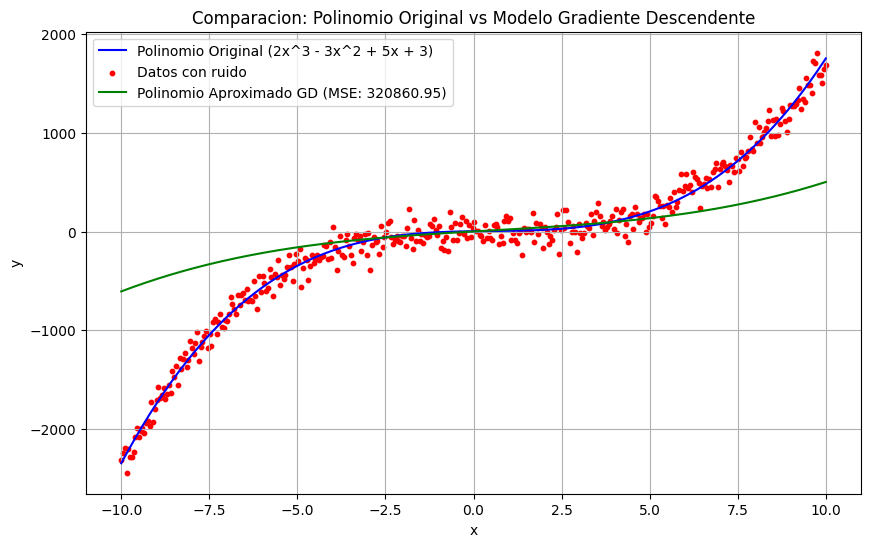

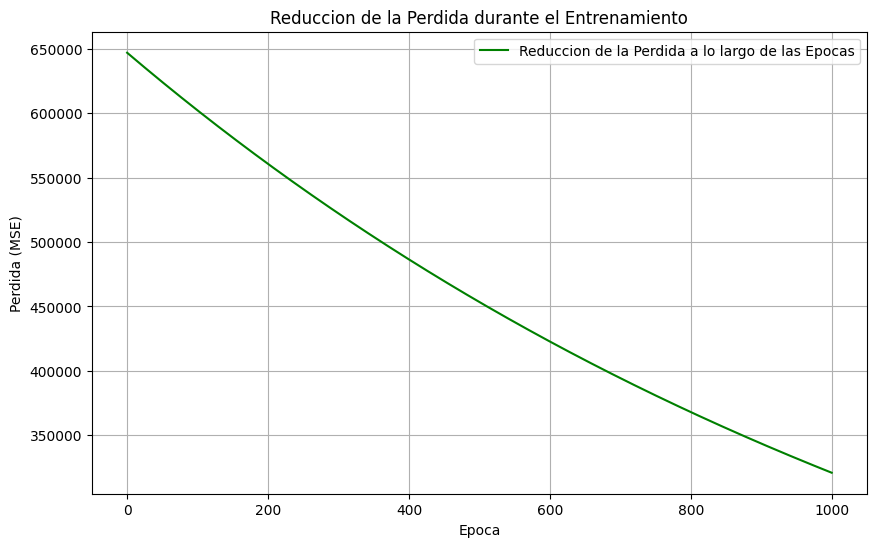

In [5]:
# Inicializar los coeficientes
gd_coefficients = np.random.rand(4)

# Lista de perdidas por epoch
gd_loss_history = []

# Learning Rate
gd_lr = 0.0001

# Cantidad de epochs
gd_epochs = 1000

# Entrenamiento para Gradiente Descendente
for epoch in range(gd_epochs):
    # Calcular los gradientes para todo el conjunto de datos
    gd_gradients = compute_gradients(gd_coefficients, x_poly_scaled, y_values_noisy)
    
    # Actualizar los parametros
    gd_coefficients -= gd_lr * gd_gradients
    
    # Calcular la perdida
    gd_predictions = np.dot(x_poly_scaled, gd_coefficients)
    gd_loss = np.mean((y_values_noisy - gd_predictions) ** 2)
    
    # Registrar la perdida
    gd_loss_history.append(gd_loss)

# Coeficientes y perdida finales
gd_final_coefficients = gd_coefficients
gd_predictions = np.dot(x_poly_scaled, gd_coefficients)
gd_final_mse = np.mean((y_values_noisy - gd_predictions) ** 2)

# MSE final
print(f'MSE Final: {gd_final_mse}')

# Generar predicciones para el modelo final de gradiente descendente
gd_final_predictions = np.dot(x_poly_scaled, gd_final_coefficients)


# Graficar el polinomio original, los datos ruidosos y el polinomio aproximado
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.plot(x_values, gd_final_predictions, label=f'Polinomio Aproximado GD (MSE: {gd_final_mse:.2f})', color='green')
plt.title('Comparacion: Polinomio Original vs Modelo Gradiente Descendente')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Graficar la reduccion de perdida a lo largo del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(gd_loss_history, label='Reduccion de la Perdida a lo largo de las Epocas', color='green')
plt.title('Reduccion de la Perdida durante el Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()


**Tuning de hiperparametros por Random Search**

In [6]:
# Rangos para los hiperparametros
gd_lr_range = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
gd_epochs_range = [10, 50, 100, 500, 1000, 1500, 2000, 5000]

# Iteraciones para el Random Search
iterations = 10

# Variables de almacenaje de los mejores valores
best_loss = np.inf
best_lr = None
best_epochs = None

for i in range(iterations):
    # Tomar valores aleatorios
    lr = np.random.choice(gd_lr_range)
    epochs = np.random.choice(gd_epochs_range)
    
    # Inicializar coeficientes
    coefficients = np.random.rand(4)
    
    # Aplicar gradiente descendente con los valores generados
    for epoch in range(epochs):
        gradients = compute_gradients(coefficients, x_poly_scaled, y_values_noisy)
        coefficients -= lr * gradients
    
    # Obtener la perdida
    final_predictions = np.dot(x_poly_scaled, coefficients)
    final_loss = np.mean((y_values_noisy - final_predictions) ** 2)
    
    # Actualizar los mejores hiperparametros
    if final_loss < best_loss:
        best_loss = final_loss
        best_lr = lr
        best_epochs = epochs
        print(f'Nuevos hiperparametros encontrados: LR={best_lr}, Epochs={best_epochs}, Loss={best_loss}')


# Mostrar en pantalla los resultados
print(f'Mejores hiperparametros: LR={best_lr}, Epochs={best_epochs}, Loss={best_loss}')

# Asignar los nuevos valores de hiperparametros    
gd_epochs = best_epochs
gd_lr = best_lr

Nuevos hiperparametros encontrados: LR=0.01, Epochs=500, Loss=13824.64675193487
Nuevos hiperparametros encontrados: LR=0.01, Epochs=2000, Loss=9646.768318562965
Nuevos hiperparametros encontrados: LR=0.01, Epochs=2000, Loss=9646.757773321164
Mejores hiperparametros: LR=0.01, Epochs=2000, Loss=9646.757773321164


**Evaluar el modelo nuevamente**

MSE Final: 9646.75242520769


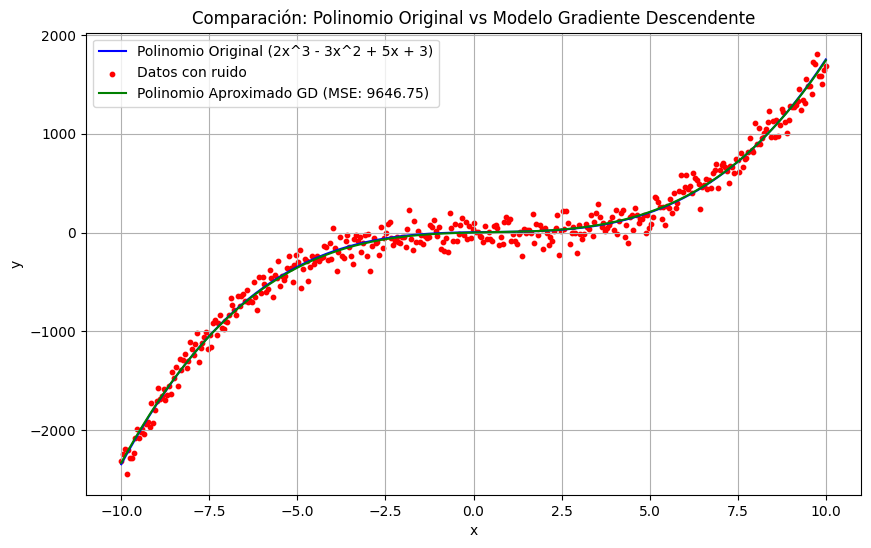

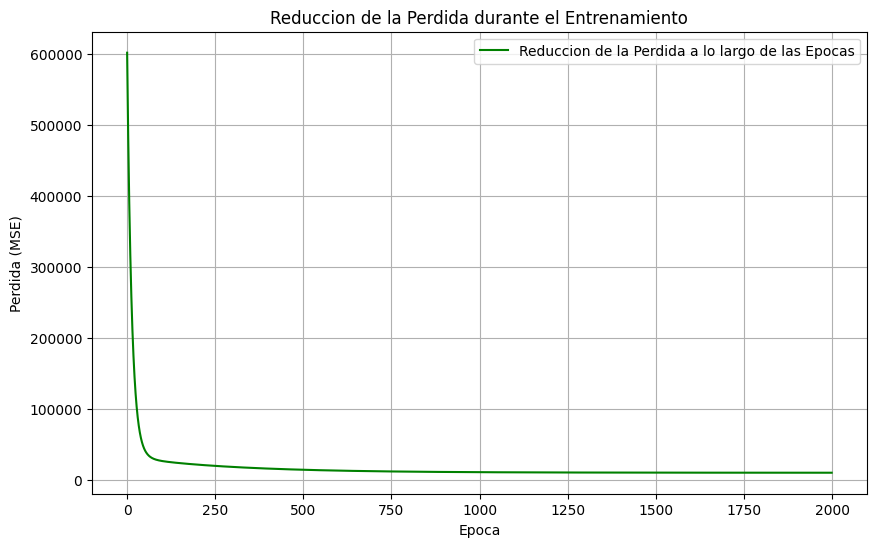

In [7]:
# Inicializar los coeficientes
gd_coefficients = np.random.rand(4)

# Lista de perdidas por epoch
gd_loss_history = []

# Entrenamiento para Gradiente Descendente
for epoch in range(gd_epochs):
    # Calcular los gradientes para todo el conjunto de datos
    gd_gradients = compute_gradients(gd_coefficients, x_poly_scaled, y_values_noisy)
    
    # Actualizar los parametros
    gd_coefficients -= gd_lr * gd_gradients
    
    # Calcular la perdida
    gd_predictions = np.dot(x_poly_scaled, gd_coefficients)
    gd_loss = np.mean((y_values_noisy - gd_predictions) ** 2)
    
    # Registrar la perdida
    gd_loss_history.append(gd_loss)

# Coeficientes y perdida finales
gd_final_coefficients = gd_coefficients
gd_predictions = np.dot(x_poly_scaled, gd_coefficients)
gd_final_mse = np.mean((y_values_noisy - gd_predictions) ** 2)

# MSE final
print(f'MSE Final: {gd_final_mse}')

# Generar predicciones para el modelo final
gd_final_predictions = np.dot(x_poly_scaled, gd_final_coefficients)


# Graficar el polinomio original, los datos ruidosos y el polinomio aproximado
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.plot(x_values, gd_final_predictions, label=f'Polinomio Aproximado GD (MSE: {gd_final_mse:.2f})', color='green')
plt.title('Comparación: Polinomio Original vs Modelo Gradiente Descendente')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Graficar la reduccion de perdida a lo largo del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(gd_loss_history, label='Reduccion de la Perdida a lo largo de las Epocas', color='green')
plt.title('Reduccion de la Perdida durante el Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### Implementacion de Gradiente Descendente Estocastico

MSE Final: 9618.8471698306


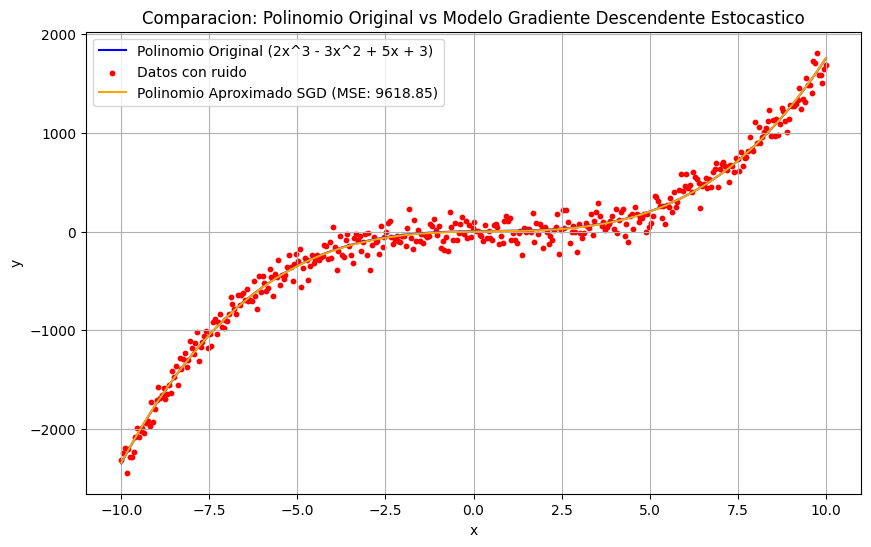

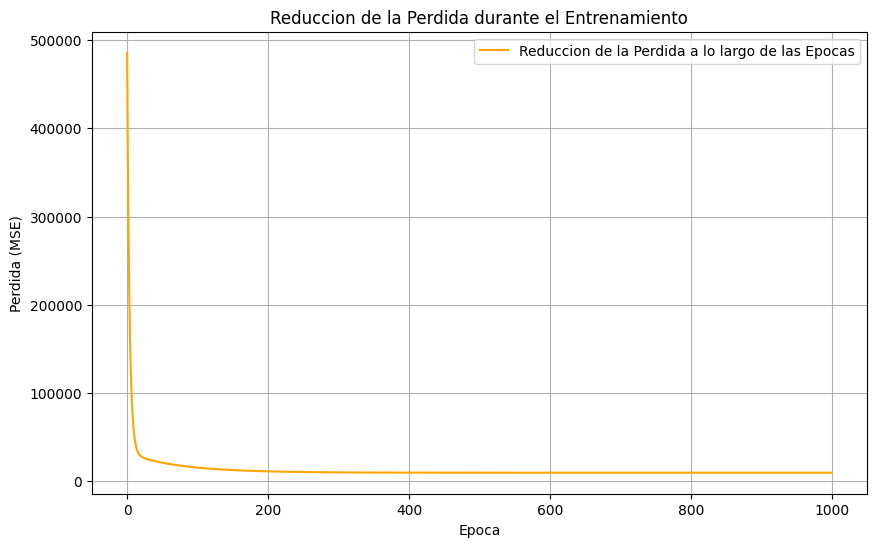

In [8]:
# Inicializar coeficientes
sgd_coefficients = np.random.rand(4)

# Learning rate
sgd_lr = 0.0001

# Cantidad de epochs
sgd_epochs = 1000

# Lista de perdidas por epochs
sgd_loss_history = []

# Entrenamiento para Gradiente Descendente Estocastico
for epoch in range(sgd_epochs):
    # Mezcla de datos de forma aleatoria
    sgd_indices = np.random.permutation(len(x_poly_scaled))
    x_poly_scaled_shuffled = x_poly_scaled[sgd_indices]
    y_values_noisy_shuffled = y_values_noisy[sgd_indices]
    
    # Bucle para un solo data point
    for i in range(len(x_poly_scaled)):
        # Obtener gradientes para el data point
        sgd_gradients = compute_gradients(sgd_coefficients, x_poly_scaled_shuffled[i:i+1], y_values_noisy_shuffled[i:i+1])
        
        # Actualizar coeficientes
        sgd_coefficients -= sgd_lr * sgd_gradients

    # Calcular la perdida
    sgd_predictions = np.dot(x_poly_scaled, sgd_coefficients)
    sgd_loss = np.mean((y_values_noisy - sgd_predictions) ** 2)

    # Registrar la perdida
    sgd_loss_history.append(sgd_loss)

# Coeficientes y pérdida finales
sgd_final_coefficients = sgd_coefficients
sgd_predictions = np.dot(x_poly_scaled, sgd_coefficients)
sgd_final_mse = np.mean((y_values_noisy - sgd_predictions) ** 2)

# MSE final
print(f'MSE Final: {sgd_final_mse}')

# Generar predicciones para el modelo final
sgd_final_predictions = np.dot(x_poly_scaled, sgd_final_coefficients)


# Graficar el polinomio original, los datos ruidosos y el polinomio aproximado
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.plot(x_values, sgd_final_predictions, label=f'Polinomio Aproximado SGD (MSE: {sgd_final_mse:.2f})', color='orange')
plt.title('Comparacion: Polinomio Original vs Modelo Gradiente Descendente Estocastico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la reduccion de perdida a lo largo del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss_history, label='Reduccion de la Perdida a lo largo de las Epocas', color='orange')
plt.title('Reduccion de la Perdida durante el Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

**Tuning de hiperparametros por Random Search**

In [9]:
# Rangos para los hiperparametros
sgd_lr_range = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
sgd_epochs_range = [10, 50, 100, 500, 1000, 1500, 2000, 5000]

# Iteraciones para el Random Search
iterations = 10

# Variables de almacenaje de los mejores valores
best_sgd_loss = np.inf
best_sgd_lr = None
best_sgd_epochs = None

for i in range(iterations):
    # Tomar valores aleatorios
    sgd_lr = np.random.choice(sgd_lr_range)
    sgd_epochs = np.random.choice(sgd_epochs_range)
    
    # Inicializar coeficientes
    sgd_coefficients = np.random.rand(4)
    sgd_loss_history = []
    
    # Aplicar SGD con los valores generados
    for epoch in range(sgd_epochs):
        # Mezcla de datos de forma aleatoria
        sgd_indices = np.random.permutation(len(x_poly_scaled))
        x_poly_scaled_shuffled = x_poly_scaled[sgd_indices]
        y_values_noisy_shuffled = y_values_noisy[sgd_indices]

        # Bucle para un solo data point
        for j in range(len(x_poly_scaled)):
            # Obtener gradientes para el data point
            sgd_gradients = compute_gradients(sgd_coefficients, x_poly_scaled_shuffled[j:j+1], y_values_noisy_shuffled[j:j+1])

            # Actualizar coeficientes
            sgd_coefficients -= sgd_lr * sgd_gradients

        # Calcular la perdida
        sgd_predictions = np.dot(x_poly_scaled, sgd_coefficients)
        sgd_loss = np.mean((y_values_noisy - sgd_predictions) ** 2)
        sgd_loss_history.append(sgd_loss)
    
    # Obtener la perdida promedio de las últimas 10 epocas para estabilizar
    avg_loss = np.mean(sgd_loss_history[-10:])
    
    # Actualizar los mejores hiperparametros si es necesario
    if avg_loss < best_sgd_loss:
        best_sgd_loss = avg_loss
        best_sgd_lr = sgd_lr
        best_sgd_epochs = sgd_epochs
        print(f'Nuevos hiperparametros encontrados: LR={best_sgd_lr}, Epochs={best_sgd_epochs}, Loss={best_sgd_loss}')

# Mostrar en pantalla los resultados
print(f'Mejores hiperparametros: LR={best_sgd_lr}, Epochs={best_sgd_epochs}, Loss={best_sgd_loss}')

# Asignar los nuevos valores de hiperparámetros
sgd_epochs = best_sgd_epochs
sgd_lr = best_sgd_lr


Nuevos hiperparametros encontrados: LR=0.0001, Epochs=100, Loss=15855.420082040533
Nuevos hiperparametros encontrados: LR=0.001, Epochs=2000, Loss=9623.490612195837
Mejores hiperparametros: LR=0.001, Epochs=2000, Loss=9623.490612195837


**Evaluar el modelo nuevamente**

MSE Final: 9624.507330380431


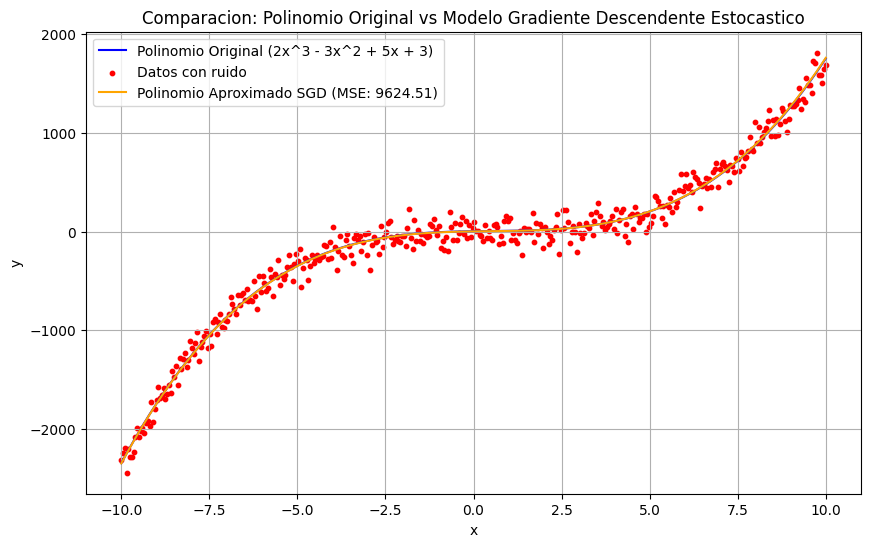

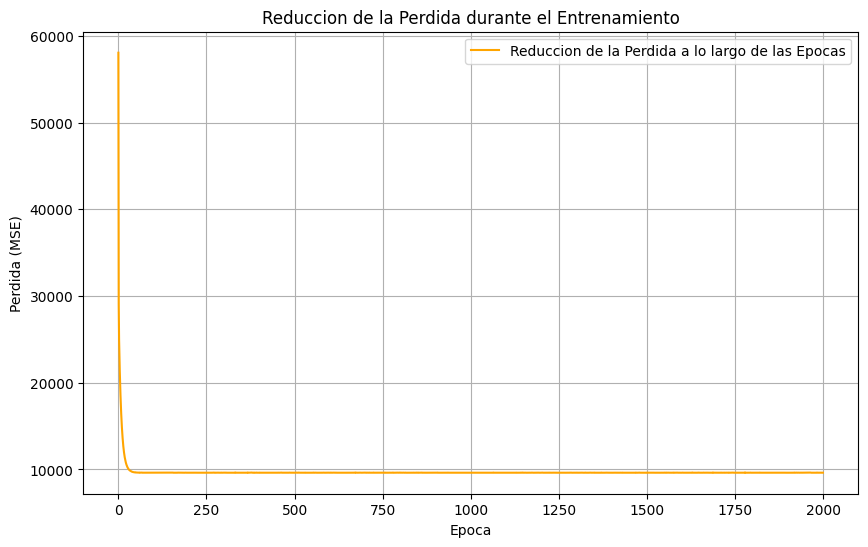

In [10]:
# Inicializar coeficientes
sgd_coefficients = np.random.rand(4)

# Lista de perdidas por epochs
sgd_loss_history = []

# Entrenamiento para Gradiente Descendente Estocastico
for epoch in range(sgd_epochs):
    # Mezcla de datos de forma aleatoria
    sgd_indices = np.random.permutation(len(x_poly_scaled))
    x_poly_scaled_shuffled = x_poly_scaled[sgd_indices]
    y_values_noisy_shuffled = y_values_noisy[sgd_indices]
    
    # Bucle para un solo data point
    for i in range(len(x_poly_scaled)):
        # Obtener gradientes para el data point
        sgd_gradients = compute_gradients(sgd_coefficients, x_poly_scaled_shuffled[i:i+1], y_values_noisy_shuffled[i:i+1])
        
        # Actualizar coeficientes
        sgd_coefficients -= sgd_lr * sgd_gradients

    # Calcular la perdida
    sgd_predictions = np.dot(x_poly_scaled, sgd_coefficients)
    sgd_loss = np.mean((y_values_noisy - sgd_predictions) ** 2)

    # Registrar la perdida
    sgd_loss_history.append(sgd_loss)

# Coeficientes y pérdida finales
sgd_final_coefficients = sgd_coefficients
sgd_predictions = np.dot(x_poly_scaled, sgd_coefficients)
sgd_final_mse = np.mean((y_values_noisy - sgd_predictions) ** 2)

# MSE final
print(f'MSE Final: {sgd_final_mse}')

# Generar predicciones para el modelo final
sgd_final_predictions = np.dot(x_poly_scaled, sgd_final_coefficients)


# Graficar el polinomio original, los datos ruidosos y el polinomio aproximado
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.plot(x_values, sgd_final_predictions, label=f'Polinomio Aproximado SGD (MSE: {sgd_final_mse:.2f})', color='orange')
plt.title('Comparacion: Polinomio Original vs Modelo Gradiente Descendente Estocastico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la reduccion de perdida a lo largo del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss_history, label='Reduccion de la Perdida a lo largo de las Epocas', color='orange')
plt.title('Reduccion de la Perdida durante el Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### Implementacion de Gradiente Descendente por mini Batchs

MSE Final: 24242.401012352864


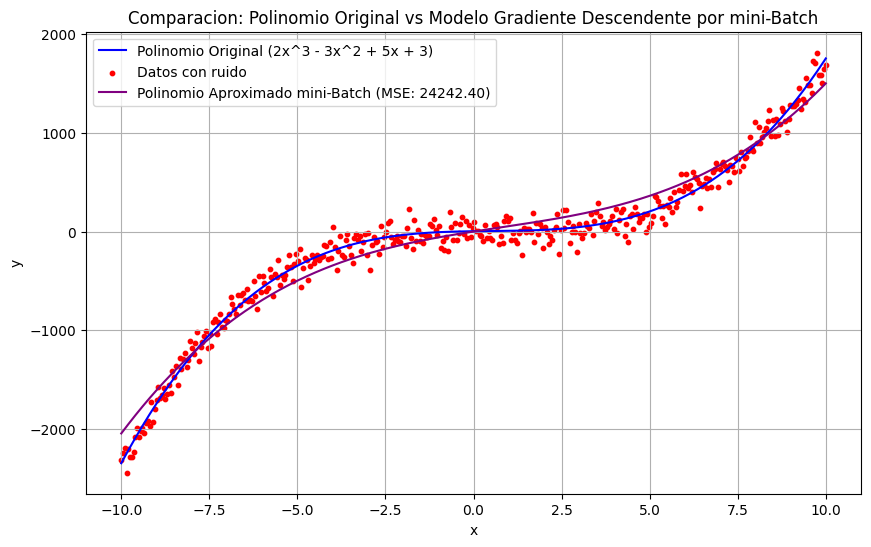

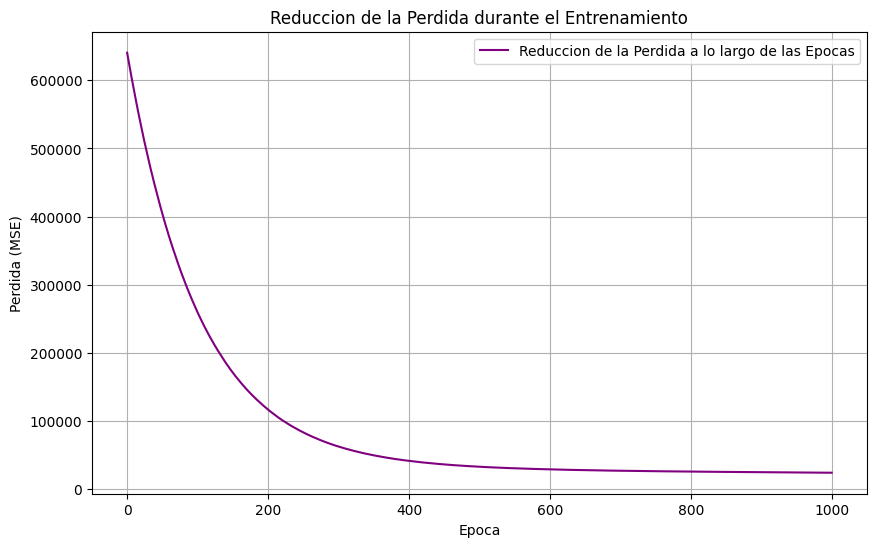

In [11]:
# Inicializar coeficientes
mini_coefficients = np.random.rand(4)

# Learning rate
mini_lr = 0.0001

# Cantidad de epochs
mini_epochs = 1000

# Lista de perdidas por epochs
mini_loss_history = []

# Mini-batch size
batch_size = 32


# Entrenamiento de Gradiente Descendente por mini batch
for epoch in range(mini_epochs):
    # Mezcla de datos de forma aleatoria
    mini_indices = np.random.permutation(len(x_poly_scaled))
    x_poly_scaled_shuffled = x_poly_scaled[mini_indices]
    y_values_noisy_shuffled = y_values_noisy[mini_indices]
    
    # Bucle para un mini Batch
    for i in range(0, len(x_poly_scaled), batch_size):
        # Extraer el mini batch aleatorio
        x_poly_mini_batch = x_poly_scaled_shuffled[i:i + batch_size]
        y_values_noisy_mini_batch = y_values_noisy_shuffled[i:i + batch_size]
        
        # Obtener los gradientes para el mini batch
        mini_gradients = compute_gradients(mini_coefficients, x_poly_mini_batch, y_values_noisy_mini_batch)
        
        # Actualizar coeficientes
        mini_coefficients -= mini_lr * mini_gradients

    # Calcular la perdida
    mini_predictions = np.dot(x_poly_scaled, mini_coefficients)
    mini_loss = np.mean((y_values_noisy - mini_predictions) ** 2)

    # Registrar la perdida
    mini_loss_history.append(mini_loss)


# Coeficientes y perdida finales
mini_final_coefficients = mini_coefficients
mini_predictions = np.dot(x_poly_scaled, mini_coefficients)
mini_final_mse = np.mean((y_values_noisy - mini_predictions) ** 2)

# MSE final
print(f'MSE Final: {mini_final_mse}')

# Generar predicciones para el modelo final
mini_final_predictions = np.dot(x_poly_scaled, mini_final_coefficients)


# Graficar el polinomio original, los datos ruidosos y el polinomio aproximado
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.plot(x_values, mini_final_predictions, label=f'Polinomio Aproximado mini-Batch (MSE: {mini_final_mse:.2f})', color='purple')
plt.title('Comparacion: Polinomio Original vs Modelo Gradiente Descendente por mini-Batch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Graficar la reduccion de perdida a lo largo del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(mini_loss_history, label='Reduccion de la Perdida a lo largo de las Epocas', color='purple')
plt.title('Reduccion de la Perdida durante el Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Rangos para los hiperparametros
mini_lr_range = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
mini_epochs_range = [10, 50, 100, 500, 1000, 1500, 2000, 5000]
batch_size_range = [16, 32, 64, 128, 256]

# Iteraciones para el Random Search
iterations = 100

# Variables de almacenaje de los mejores valores
best_mini_loss = np.inf
best_mini_lr = None
best_mini_epochs = None
best_batch_size = None 

for i in range(iterations):
    # Tomar valores aleatorios
    mini_lr = np.random.choice(mini_lr_range)
    mini_epochs = np.random.choice(mini_epochs_range)
    batch_size = np.random.choice(batch_size_range)
    
    # Inicializar coeficientes
    mini_coefficients = np.random.rand(4)
    mini_loss_history = []
    
    # Aplicar Mini-Batch Gradient Descent con los valores generados
    for epoch in range(mini_epochs):
        # Mezcla de datos de forma aleatoria
        mini_indices = np.random.permutation(len(x_poly_scaled))
        x_poly_scaled_shuffled = x_poly_scaled[mini_indices]
        y_values_noisy_shuffled = y_values_noisy[mini_indices]
        
        # Bucle para un mini Batch
        for j in range(0, len(x_poly_scaled), batch_size):
            # Extraer el mini batch aleatorio
            x_poly_mini_batch = x_poly_scaled_shuffled[j:j + batch_size]
            y_values_noisy_mini_batch = y_values_noisy_shuffled[j:j + batch_size]
            
            # Obtener los gradientes para el mini batch
            mini_gradients = compute_gradients(mini_coefficients, x_poly_mini_batch, y_values_noisy_mini_batch)
            
            # Actualizar coeficientes
            mini_coefficients -= mini_lr * mini_gradients

        # Calcular la perdida
        mini_predictions = np.dot(x_poly_scaled, mini_coefficients)
        mini_loss = np.mean((y_values_noisy - mini_predictions) ** 2)
        mini_loss_history.append(mini_loss)
    
    # Obtener la perdida promedio de las últimas 10 epocas para estabilizar
    avg_loss = np.mean(mini_loss_history[-10:])
    
    # Actualizar los mejores hiperparametros si es necesario
    if avg_loss < best_mini_loss:
        best_mini_loss = avg_loss
        best_mini_lr = mini_lr
        best_mini_epochs = mini_epochs
        best_batch_size = batch_size
        print(f'Nuevos hiperparametros encontrados: LR={best_mini_lr}, Epochs={best_mini_epochs}, Batch Size={best_batch_size}, Loss={best_mini_loss}')  # Actualizar según sea necesario

# Mostrar en pantalla los resultados
print(f'Mejores hiperparametros: LR={best_mini_lr}, Epochs={best_mini_epochs}, Batch Size={best_batch_size}, Loss={best_mini_loss}')  # Actualizar según sea necesario

# Asignar los nuevos valores de hiperparámetros
mini_epochs = best_mini_epochs
mini_lr = best_mini_lr
batch_size = best_batch_size

Nuevos hiperparametros encontrados: LR=0.0001, Epochs=500, Batch Size=256, Loss=322523.7291328708
Nuevos hiperparametros encontrados: LR=0.0001, Epochs=1500, Batch Size=32, Loss=21277.219197898776
Nuevos hiperparametros encontrados: LR=0.1, Epochs=100, Batch Size=128, Loss=9712.89501800422
Nuevos hiperparametros encontrados: LR=0.01, Epochs=1500, Batch Size=16, Loss=9621.444806710568
Nuevos hiperparametros encontrados: LR=0.01, Epochs=2000, Batch Size=16, Loss=9619.545312216398
Nuevos hiperparametros encontrados: LR=0.001, Epochs=5000, Batch Size=16, Loss=9618.810702692681
Mejores hiperparametros: LR=0.001, Epochs=5000, Batch Size=16, Loss=9618.810702692681


MSE Final: 9618.808436078845


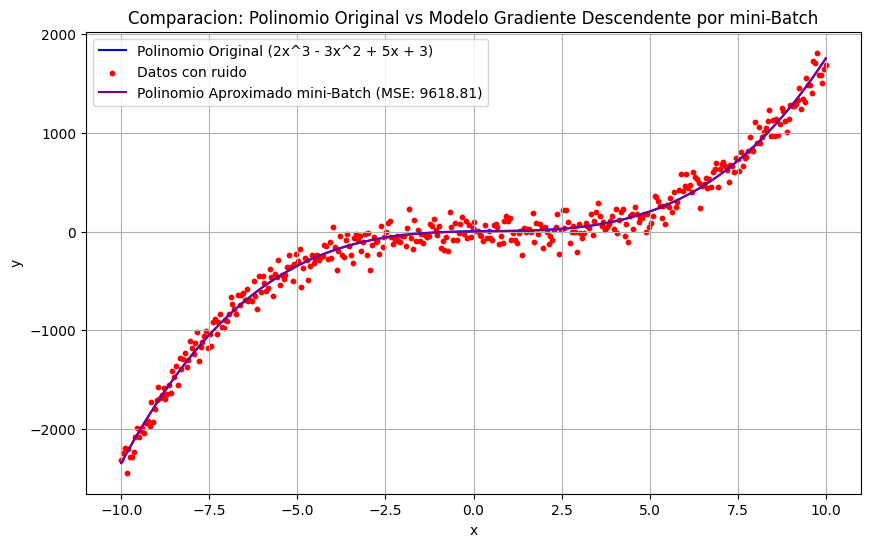

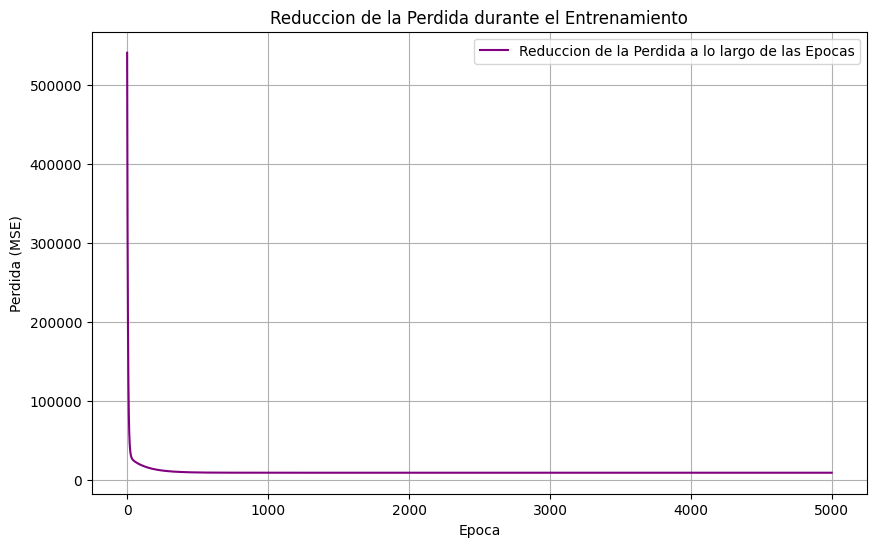

In [13]:
# Inicializar coeficientes
mini_coefficients = np.random.rand(4)

# Lista de perdidas por epochs
mini_loss_history = []

# Entrenamiento de Gradiente Descendente por mini batch
for epoch in range(mini_epochs):
    # Mezcla de datos de forma aleatoria
    mini_indices = np.random.permutation(len(x_poly_scaled))
    x_poly_scaled_shuffled = x_poly_scaled[mini_indices]
    y_values_noisy_shuffled = y_values_noisy[mini_indices]
    
    # Bucle para un mini Batch
    for i in range(0, len(x_poly_scaled), batch_size):
        # Extraer el mini batch aleatorio
        x_poly_mini_batch = x_poly_scaled_shuffled[i:i + batch_size]
        y_values_noisy_mini_batch = y_values_noisy_shuffled[i:i + batch_size]
        
        # Obtener los gradientes para el mini batch
        mini_gradients = compute_gradients(mini_coefficients, x_poly_mini_batch, y_values_noisy_mini_batch)
        
        # Actualizar coeficientes
        mini_coefficients -= mini_lr * mini_gradients

    # Calcular la perdida
    mini_predictions = np.dot(x_poly_scaled, mini_coefficients)
    mini_loss = np.mean((y_values_noisy - mini_predictions) ** 2)

    # Registrar la perdida
    mini_loss_history.append(mini_loss)


# Coeficientes y perdida finales
mini_final_coefficients = mini_coefficients
mini_predictions = np.dot(x_poly_scaled, mini_coefficients)
mini_final_mse = np.mean((y_values_noisy - mini_predictions) ** 2)

# MSE final
print(f'MSE Final: {mini_final_mse}')

# Generar predicciones para el modelo final
mini_final_predictions = np.dot(x_poly_scaled, mini_final_coefficients)


# Graficar el polinomio original, los datos ruidosos y el polinomio de nuestro modelo
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polinomio Original (2x^3 - 3x^2 + 5x + 3)', color='blue')
plt.scatter(x_values, y_values_noisy, label='Datos con ruido', color='red', s=10)
plt.plot(x_values, mini_final_predictions, label=f'Polinomio Aproximado mini-Batch (MSE: {mini_final_mse:.2f})', color='purple')
plt.title('Comparacion: Polinomio Original vs Modelo Gradiente Descendente por mini-Batch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Graficar la reduccion de perdida a lo largo del entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(mini_loss_history, label='Reduccion de la Perdida a lo largo de las Epocas', color='purple')
plt.title('Reduccion de la Perdida durante el Entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### Comparacion de tiempos de ejecucion

**Tiempos de ejecucion de cada modelo Pre-Tuning:**
- Gradiente Descendente: 197 ms
- Gradiente Descendente Estocástico: 1.9 s
- Gradiente Descendente por Mini-Lote: 255 ms


**Tiempos de ejecucion de cada modelo Post-Tuning:**
- Gradiente Descendente: 197 ms
- Gradiente Descendente Estocástico: 3.5 s
- Gradiente Descendente por Mini-Lote: 880 ms

**Tiempos de ejecucion para el Random Search de 10 iteraciones para el tuning:**
- Gradiente Descendente: 67 ms
- Gradiente Descendente Estocástico: 28.6 s
- Gradiente Descendente por Mini-Lote: 10.9 s

**Conclusion**
El Gradiente Descendente es consistentemente el más rápido tanto antes como después del ajuste, sin variación en el tiempo de ejecución. Esto se debe a su naturaleza de procesar el conjunto completo de datos en cada iteración, lo cual es computacionalmente eficiente para conjuntos de datos no muy grandes como el que se uso actualmente (400 valores).

### Comparacion de Fitness de cada metodo

Para evaluar el fintess de cada modelo se utilizo el MSE, mientras mas bajo, mejor ajustado esta el modelo.

**MSE de cada modelo Pre-Tuning:**
- Gradiente Descendente: 320860.948
- Gradiente Descendente Estocástico: 9618.847
- Gradiente Descendente por Mini-Lote: 24242.401


**MSE de cada modelo Post-Tuning:**
- Gradiente Descendente: 9646.752
- Gradiente Descendente Estocástico: 9624.507
- Gradiente Descendente por Mini-Lote: 9618.808
  

**Conclusion**
Post Tuning, los tres métodos muestran un rendimiento similar en términos de MSE, con una ligera ventaja para el Gradiente Descendente por Mini-Batch. Por otro lado, la mejora significativa en el MSE de Gradiente Descendente después del tuning destaca la importancia del ajuste de parámetros.

### Conclusion Final

La elección entre estos métodos depende de las prioridades entre rapidez y precisión. Para conjuntos de datos de un tamaño relativamente pequeño, el Gradiente Descendente es preferible para rápidas iteraciones, claro siempre y cuando se le aplique algun tipo de tuning a los hiperparametros para que sea viable, de lo contrario Gradiente Descendente Estocastico podría ser la mejor opción para equilibrar tiempo de ejecución y precisión sin necesidad de un ajuste adecuado.